## Import Libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Load the Dataset

In [69]:
# from sklearn.datasets import load_iris
IRIS = pd.read_csv('/content/IRIS.csv')
X = IRIS.drop('species', axis=1) # Assuming 'species' is your target variable column name
y = IRIS['species'] # Extract the target variable 'species'

## Exploratory Data Analysis (EDA)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2     NaN
1           4.9          3.0           1.4          0.2     NaN
2           4.7          3.2           1.3          0.2     NaN
3           4.6          3.1           1.5          0.2     NaN
4           5.0          3.6           1.4          0.2     NaN


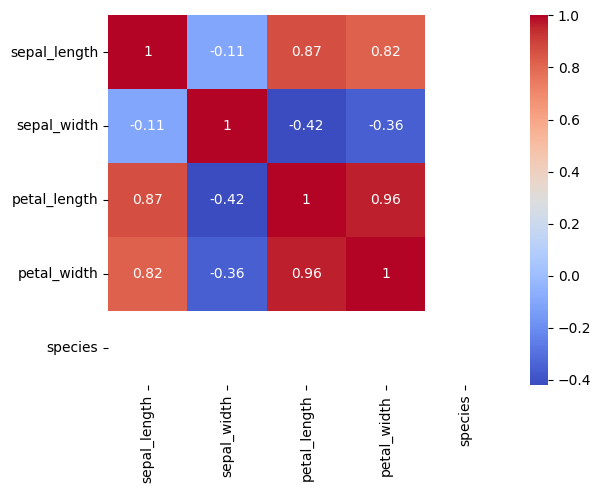

In [70]:
df = pd.DataFrame(data=IRIS, columns=IRIS.columns) # Use the DataFrame itself as data
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows of the dataframe
print(df.head())

# Plot pairplot
# sns.pairplot(df, hue='species')
# plt.show()

# Plot heatmap of correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Split the Dataset

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the Model

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Make Predictions

In [74]:
y_pred = knn.predict(X_test)

## Evaluate the Model

Accuracy: 100.00%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


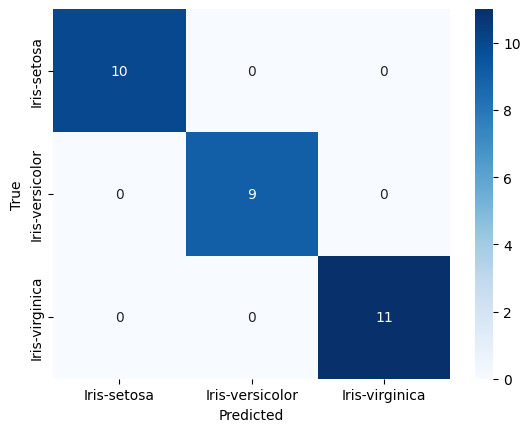

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
unique_targets = y.unique()
print(classification_report(y_test, y_pred, target_names=unique_targets))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_targets, yticklabels=unique_targets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()